In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import warnings
warnings.filterwarnings("ignore")

In [6]:
a = pd.read_csv("RAW_interactions.csv")
a.head(2)

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."


In [7]:
b = pd.read_csv("RAW_recipes.csv")
b.head(3)

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13


In [8]:
a.shape , b.shape

((1132367, 5), (231637, 12))

In [9]:
# here we can see that the both the file contains same number of unique food name
# here food name and recipe are same
len(a.recipe_id.unique()), len(b.id.unique())

(231637, 231637)

In [10]:
# with same min and max id 
a.recipe_id.min(), a.recipe_id.max(), b.id.min(), b.id.max()

(38, 537716, 38, 537716)

In [11]:
# Data set is big so take some random samples

a = a.sample(50000)
b = b.sample(50000)

In [12]:
a.shape, b.shape

((50000, 5), (50000, 12))

In [13]:
# merging both the data based on the id from b and recipe_id from a

data = pd.merge(a,b, right_on='id',left_on='recipe_id')

In [14]:
data.shape

(10555, 17)

In [15]:
# To rename all the food names with different IDs to the same ID in a DataFrame, 
# you can use the groupby and transform functions in pandas. 
data['recipe_id'] = data.groupby('name')['recipe_id'].transform('min')

In [16]:
data.head(2)

,user_id,recipe_id,date,rating,review,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,486725,269658,2008-01-07,4,"This was a good marinade. I halved the water, ...",pork tenderloin in bourbon brown sugar marinade,269658,510,369715,2007-12-03,"['main-ingredient', 'healthy', 'pork', 'low-fa...","[397.6, 12.0, 110.0, 62.0, 99.0, 13.0, 10.0]",9,"['in a shallow glass casserole dish , combine ...",i love to cook pork like this. i have also use...,"['sour mash', 'dark brown sugar', 'soy sauce',...",9
1,2567666,374887,2013-02-18,5,"Excellent! My 11 year old daughter, who is bec...",rotel corn,374887,40,532785,2009-05-28,"['60-minutes-or-less', 'time-to-make', 'course...","[330.2, 27.0, 20.0, 12.0, 15.0, 50.0, 14.0]",5,"['preheat oven to 350 degrees', 'place all ing...",this recipe comes from a friend of mine. i had...,"['corn', 'cream cheese', 'rotel tomatoes & chi...",5


In [17]:
a[a.recipe_id == 31490]

,user_id,recipe_id,date,rating,review


In [18]:
b[b.id == 31490]

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients


In [19]:
data[data.recipe_id == 31490]

,user_id,recipe_id,date,rating,review,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients


In [20]:
data.drop(["submitted","contributor_id","id"],axis=1,inplace=True)

In [21]:
data.describe()

,user_id,recipe_id,rating,minutes,n_steps,n_ingredients
count,1.055500e+04,10555.000000,10555.000000,1.055500e+04,10555.000000,10555.000000
mean,1.297178e+08,163727.646045,4.419896,2.035430e+05,9.520322,8.967598
std,4.862051e+08,131374.913252,1.251909,2.090262e+07,5.647990,3.723875
min,1.533000e+03,66.000000,0.000000,0.000000e+00,1.000000,1.000000
25%,1.331740e+05,54259.000000,4.000000,2.000000e+01,6.000000,6.000000
50%,3.305450e+05,127353.000000,5.000000,4.000000e+01,8.000000,9.000000
75%,7.813015e+05,251957.000000,5.000000,6.500000e+01,12.000000,11.000000
max,2.002349e+09,535108.000000,5.000000,2.147484e+09,97.000000,32.000000


* Minutes & n_steps have outliear

In [22]:
data.columns

Index(['user_id', 'recipe_id', 'date', 'rating', 'review', 'name', 'minutes',
       'tags', 'nutrition', 'n_steps', 'steps', 'description', 'ingredients',
       'n_ingredients'],
      dtype='object')

In [23]:
data.nutrition[0]

'[397.6, 12.0, 110.0, 62.0, 99.0, 13.0, 10.0]'

In [24]:
data[['calories','total fat','sugar','sodium','protein','saturated fat','carbohydrates']] = data.nutrition.str.split(",",expand=True) 
data['calories'] = data['calories'].apply(lambda x: x.replace("[" ,""))
data['carbohydrates'] = data['carbohydrates'].apply(lambda x: x.replace("]" ,""))
data[['calories','total fat','sugar','sodium','protein','saturated fat','carbohydrates']] =  data[['calories','total fat','sugar','sodium','protein','saturated fat','carbohydrates']].astype(float)

<Axes: xlabel='n_steps', ylabel='Density'>

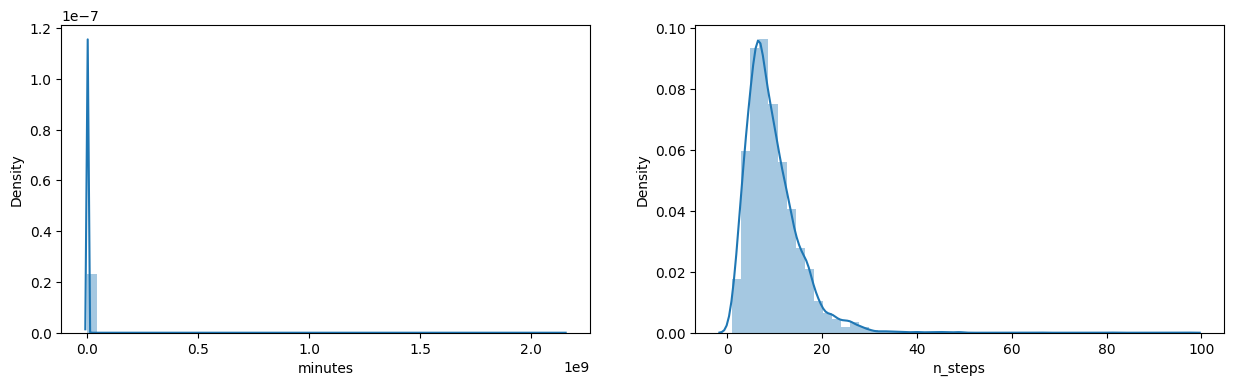

In [25]:
fig,ax = plt.subplots(1,2,figsize=(15,4))
sns.distplot(data["minutes"],ax=ax[0])
sns.distplot(data["n_steps"],ax=ax[1])

<Axes: >

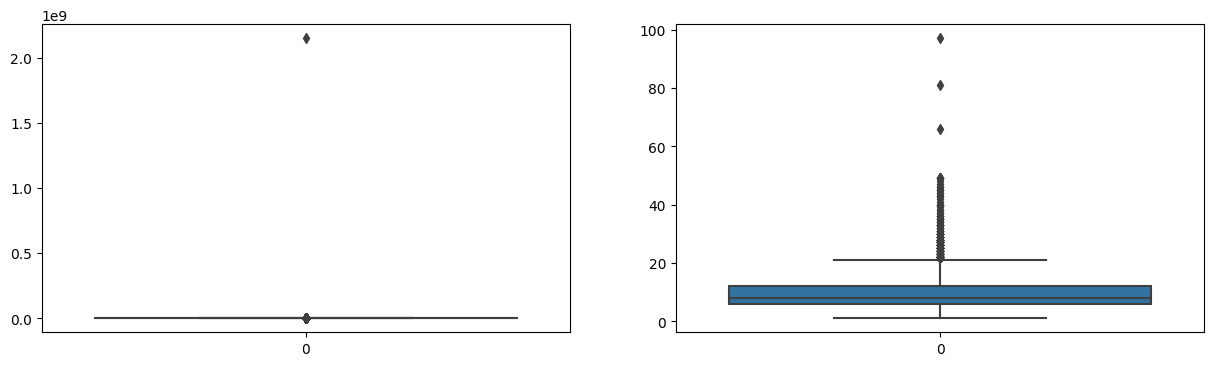

In [26]:
fig,ax = plt.subplots(1,2,figsize=(15,4))
sns.boxplot(data=data["minutes"],ax=ax[0])
sns.boxplot(data=data["n_steps"],ax=ax[1])

In [27]:
q1 = np.percentile(data["minutes"],25)
q3 = np.percentile(data["minutes"],75)
IQR = q3- q1
upper = q3 + 1.5*IQR
lower = q1 - 1.5*IQR

data = data.drop((data[data["minutes"]>=upper].index | data[data["minutes"]<=lower].index),axis=0)

In [28]:
q1 = np.percentile(data["n_steps"],25)
q3 = np.percentile(data["n_steps"],75)
IQR = q3- q1
upper = q3 + 1.5*IQR
lower = q1 - 1.5*IQR

data = data.drop((data[data["n_steps"]>=upper].index | data[data["n_steps"]<=lower].index),axis=0)

<Axes: >

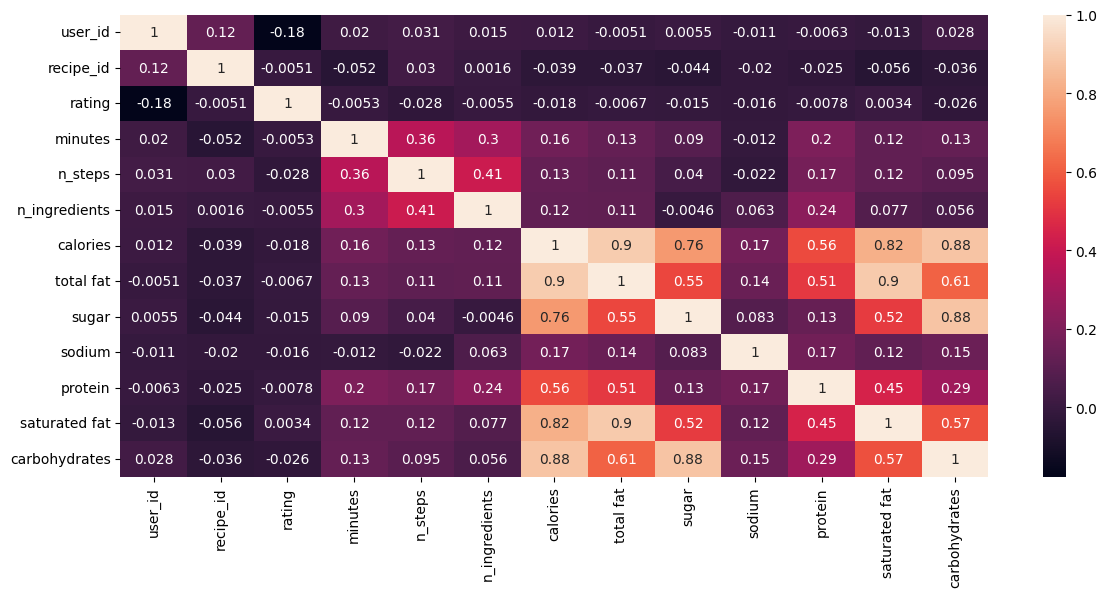

In [29]:
plt.figure(figsize=(14,6))
sns.heatmap(data.corr(),annot=True)

<Axes: xlabel='n_ingredients', ylabel='minutes'>

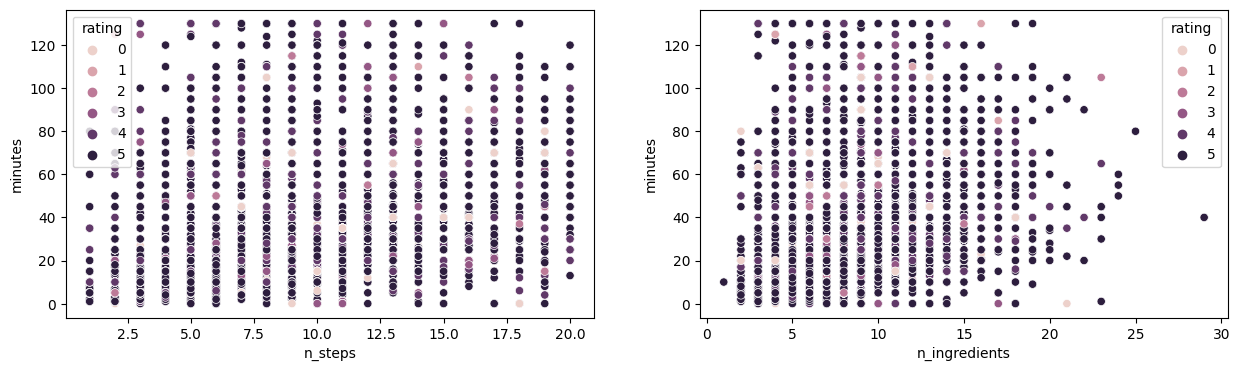

In [30]:
fig,ax = plt.subplots(1,2,figsize=(15,4))
sns.scatterplot(data=data,x="n_steps",y="minutes" ,hue="rating",ax=ax[0])
sns.scatterplot(data=data,x="n_ingredients",y="minutes" ,hue="rating",ax=ax[1])

<Axes: xlabel='carbohydrates', ylabel='sugar'>

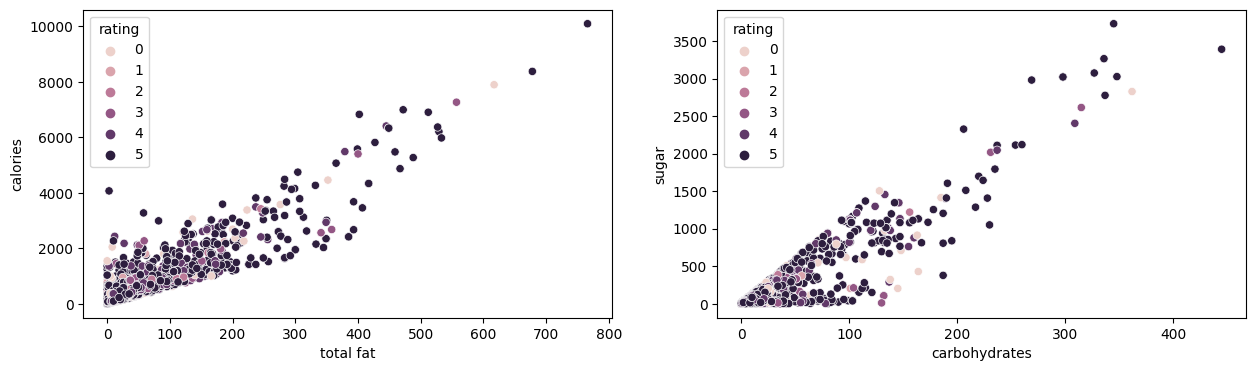

In [31]:
fig,ax = plt.subplots(1,2,figsize=(15,4))
sns.scatterplot(data=data,x="total fat",y="calories" ,hue="rating",ax=ax[0])
sns.scatterplot(data=data,x="carbohydrates",y="sugar" ,hue="rating",ax=ax[1])

<Axes: xlabel='n_steps', ylabel='n_ingredients'>

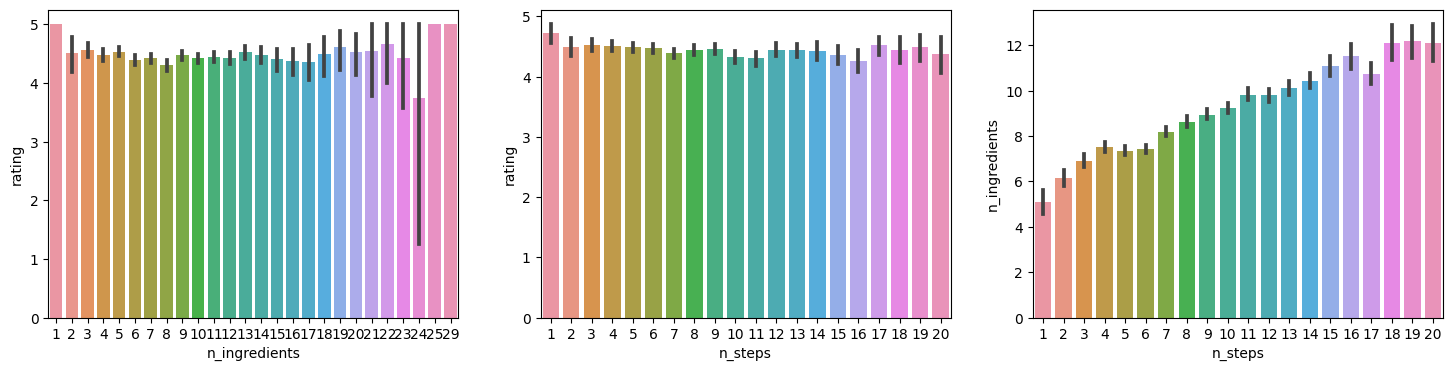

In [32]:
fig,ax = plt.subplots(1,3,figsize=(18,4))
sns.barplot(data=data,y="rating",x="n_ingredients",ax=ax[0])
sns.barplot(data=data,y="rating",x="n_steps",ax=ax[1])
sns.barplot(data=data,y="n_ingredients",x="n_steps",ax=ax[2])

In [33]:
data.isnull().sum()
data.dropna(inplace=True)

In [34]:
data.shape

(8874, 21)

In [35]:
def name_strip(data):
    data = data.lower().replace("  ", " ")
    data = data.strip()
    return data

data['name'] = data['name'].apply(name_strip)

In [36]:
data.ingredients

1        ['corn', 'cream cheese', 'rotel tomatoes & chi...
2        ['cream cheese', 'sugar', 'key lime juice', 'c...
3        ['sugar', 'cocoa', 'salt', 'butter', 'milk', '...
4        ['vegetable oil', 'cajun seasoning', 'italian ...
5        ['vinegar', 'garlic cloves', 'dark molasses', ...
                               ...                        
10548    ['plum tomatoes', 'cucumber', 'cubanelle peppe...
10549    ['meatloaf', 'monterey jack cheese', 'whole gr...
10550    ['fruit cocktail', 'mini marshmallows', 'walnu...
10551    ['ritz crackers', 'peanut butter', 'white choc...
10554    ['hamburger meat', 'american cheese', 'lettuce...
Name: ingredients, Length: 8874, dtype: object

In [37]:
unique_ing = []
for ings in data.ingredients:
    for ing in literal_eval(ings):
        if ing not in unique_ing:
            unique_ing.append(ing)
len(unique_ing), unique_ing

(4242,
 ['corn',
  'cream cheese',
  'rotel tomatoes & chilies',
  'butter',
  'salt and pepper',
  'sugar',
  'key lime juice',
  'cool whip',
  'graham cracker pie crust',
  'cocoa',
  'salt',
  'milk',
  'peanut butter',
  'quick-cooking oats',
  'vanilla',
  'vegetable oil',
  'cajun seasoning',
  'italian seasoning',
  'lemon pepper',
  'garlic powder',
  'boneless skinless chicken breast halves',
  'vinegar',
  'garlic cloves',
  'dark molasses',
  'onion powder',
  'salmon fillet',
  'sour cream',
  'prepared mustard',
  'onions',
  'dried dill weed',
  'mayonnaise',
  'parmesan cheese',
  'cheddar cheese',
  'paprika',
  'long grain rice',
  'water',
  'white vinegar',
  'self raising flour',
  'baking powder',
  'honey',
  'bananas',
  'flour',
  'light brown sugar',
  'baking soda',
  'cinnamon',
  'ginger',
  'clove',
  'cider vinegar',
  'low-fat buttermilk',
  'egg',
  'ground cinnamon',
  'table salt',
  'vanilla extract',
  'braeburn apple',
  'unsweetened applesauce',
 

In [38]:
nonveg_ingred = [
    "Chicken",
    "Beef",
    "Pork",
    "Lamb",
    "Fish",
    "Shrimp",
    "Crab",
    "Lobster",
    "Mussels",
    "Clams",
    "Oysters",
    "Scallops",
    "Squid",
    "Octopus",
    "Turkey",
    "Duck",
    "Goose",
    "Venison",
    "Bison",
    "Rabbit",
    "Quail",
    "Pheasant",
    "Sausage",
    "Bacon",
    "Ham",
    "Salmon",
    "Tuna",
    "Trout",
    "Anchovies",
    "Sardines",
    "Cod",
    "Haddock",
    "Crabmeat",
    "Lobster",
    "Shellfish",
    "Calamari",
    "Oysters",
    "Mussels",
    "Clams",
    "Caviar",
    "Escargot",
    "Foie Gras",
    "Liver",
    "Kidney",
    "Sweetbreads",
    "Tripe",
    "Gelatin",
    "Bone broth",
    "Eggs"
]

In [39]:
def ingredient_check(data):
    ingreds = literal_eval(data)
    typ = "Veg"
    for x in nonveg_ingred:
        for ing in ingreds:
            if x.lower() in ing.lower():
                typ = "Non Veg"
                return typ
    return typ

data["Veg/Non"] = data["ingredients"].apply(ingredient_check)

In [40]:
# data = data.drop(['non veg'], axis=1)

In [41]:
data.columns

Index(['user_id', 'recipe_id', 'date', 'rating', 'review', 'name', 'minutes',
       'tags', 'nutrition', 'n_steps', 'steps', 'description', 'ingredients',
       'n_ingredients', 'calories', 'total fat', 'sugar', 'sodium', 'protein',
       'saturated fat', 'carbohydrates', 'Veg/Non'],
      dtype='object')

<BarContainer object of 2 artists>

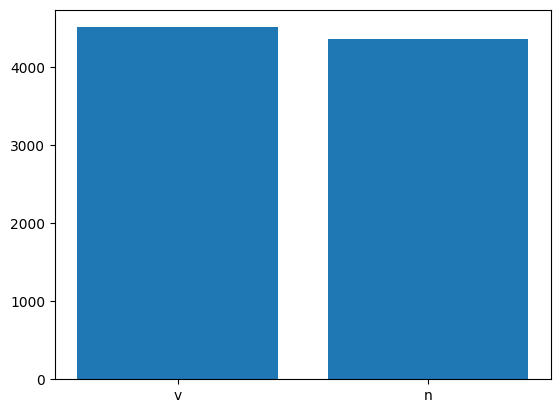

In [42]:
data["Veg/Non"].unique()
lg = len(data[data["Veg/Non"] == "Non Veg"])
plt.bar(x=['v', 'n'], height=[lg, len(data)-lg])

In [43]:
rec = data.copy()
rec = rec[["recipe_id","rating","name","tags","description","ingredients","Veg/Non"]]

In [44]:
rate = rec.groupby("name")["rating"].mean().reset_index()

In [45]:
rate

,name,rating
0,1 000 artichoke hearts,5.000000
1,1 2 3 4 tater tot casserole,4.500000
2,1 2 cup soup,5.000000
3,1 hour ham and bean soup,4.000000
4,1 pan fudge cake,4.666667
...,...,...
6195,zucchini jack casserole,5.000000
6196,zucchini kugel,4.000000
6197,zucchini meat loaf,5.000000
6198,zucchini salsa canned,5.000000


In [46]:
rate.to_csv('data/Mean_rating.csv')

In [47]:
import nltk

In [48]:
rec.duplicated().sum()

1951

In [49]:
rec.drop_duplicates(inplace=True)

In [50]:
rec.reset_index(drop=True,inplace=True)

In [51]:
rec.head(1)

,recipe_id,rating,name,tags,description,ingredients,Veg/Non
0,374887,5,rotel corn,"['60-minutes-or-less', 'time-to-make', 'course...",this recipe comes from a friend of mine. i had...,"['corn', 'cream cheese', 'rotel tomatoes & chi...",Veg


In [52]:
rec.iloc[0]['tags']

"['60-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'preparation', 'occasion', '5-ingredients-or-less', 'side-dishes', 'vegetables', 'easy', 'dietary', 'spicy', 'low-sodium', 'low-in-something', 'corn', 'tomatoes', 'taste-mood']"

In [53]:
rec.iloc[0]['ingredients']

"['corn', 'cream cheese', 'rotel tomatoes & chilies', 'butter', 'salt and pepper']"

In [54]:
rec.shape

(6923, 7)

In [55]:
import string

def convert_to_list(data):
    a = data.replace("-"," ").replace("[","").replace("]","")
#     a = ''.join([i for i in a if not i.isdigit()])
    a = a.translate(str.maketrans('', '', string.punctuation))
    return a

In [56]:
rec["tags"] = rec["tags"].apply(lambda x: convert_to_list(x))
rec["ingredients"] = rec["ingredients"].apply(lambda x: convert_to_list(x))
rec["description"] = rec["description"].apply(lambda x: convert_to_list(x))

In [57]:
rec["soup"] = rec["tags"] + rec["description"] + rec["ingredients"] + rec["Veg/Non"]
rec = rec[~rec.duplicated("name")]
rec.reset_index(drop=True,inplace=True)

In [58]:
rec.shape
# rec.to_csv("food.csv")

(6200, 8)

In [59]:
cv = TfidfVectorizer()
rec_tfidf = cv.fit_transform(rec["soup"])
name_tfidf = cv.fit_transform(rec["name"])
rec_consin_sim = linear_kernel(rec_tfidf,rec_tfidf)
name_consin_sim = linear_kernel(name_tfidf,name_tfidf)

In [60]:
rec_consin_sim.shape, name_consin_sim.shape

((6200, 6200), (6200, 6200))

In [61]:
# rec = rec.reset_index()

In [62]:
len(rec.name.unique())

6200

In [63]:
indices = rec[['name', 'recipe_id']]
indices = indices.set_index('name')
indices['index'] = np.arange(len(indices))
indices

,recipe_id,index
name,,
rotel corn,374887,0
easy key lime pie,147703,1
no bake chocolate oatmeal cookies gluten free,228152,2
grilled cajun chicken,248669,3
soy sauce substitute with very low sodium,295264,4
...,...,...
summer garden bread salad,94301,6195
meatloaf sandwiches,395800,6196
quick easy and yummy fruit salad,266722,6197


In [64]:
indices.shape

(6200, 2)

In [65]:
# indices = pd.Series(rec.index,index=rec['name'])

def recommendation(data,sim):
    re_li = []
    df = pd.DataFrame([])
    ind = indices[indices.index == data]['index'][0]
    print(ind)
    sim_score = list(enumerate(sim[ind]))
    sim_score = sorted(sim_score,key=lambda x:x[1],reverse=True)
    sim_score = sim_score[0:10]
#     print(sim_score)
    rec_indices = [i[0] for i in sim_score]
#     print(rec_indices)
    for i in rec_indices:
        re_li.append(rec.iloc[i]["name"])
        
    return re_li

# recommendation("potatoes oh  brian")

In [66]:
rec[:1]["name"][0]

'rotel corn'

In [67]:
# Recommendation based on name

recommendation('rotel corn',name_consin_sim)

0


['rotel corn',
 'sausage rotel dip',
 'caramel corn',
 'baked corn casserole',
 'honey corn bread',
 'mexican corn soup',
 'pumpkin corn muffins',
 'creamy corn bake',
 'delicious corn muffins',
 'shrimp  corn chowder']

In [70]:
# Recommendation based on tags, description, ingredients

recommendation('rotel corn',rec_consin_sim)

0


['rotel corn',
 'sweet poached corn',
 'chicken bacon and corn chowder',
 'bbq cob of corn with pepper',
 'signe s salsa',
 'mexican meat pie',
 'corn chowder with chipotle',
 'sausage ro tel party dip',
 'garden fresh corn',
 'chicken enchiladas suiza']

In [74]:
rec.to_csv('data/rec.csv')
indices.to_csv('data/indices.csv')
data.to_csv('data/data.csv')

In [75]:
np.save('data/rec_consin_sim', rec_consin_sim)
np.save('data/name_consin_sim', name_consin_sim)

In [76]:
rec.shape, data.shape

((6200, 8), (8874, 22))

In [77]:
data.shape

(8874, 22)

In [78]:
rating = data.copy()
rating['recipe'] = rating.groupby('name')['recipe_id'].transform('min')

In [79]:
# rating = rating.drop_duplicates(subset=['name','recipe_id'])

In [80]:
rating.head(2)

,user_id,recipe_id,date,rating,review,name,minutes,tags,nutrition,n_steps,...,n_ingredients,calories,total fat,sugar,sodium,protein,saturated fat,carbohydrates,Veg/Non,recipe
1,2567666,374887,2013-02-18,5,"Excellent! My 11 year old daughter, who is bec...",rotel corn,40,"['60-minutes-or-less', 'time-to-make', 'course...","[330.2, 27.0, 20.0, 12.0, 15.0, 50.0, 14.0]",5,...,5,330.2,27.0,20.0,12.0,15.0,50.0,14.0,Veg,374887
2,356127,147703,2006-10-10,5,Fantastic pie-wish I could give it more than 5...,easy key lime pie,10,"['15-minutes-or-less', 'time-to-make', 'course...","[470.4, 48.0, 133.0, 13.0, 9.0, 91.0, 14.0]",5,...,5,470.4,48.0,133.0,13.0,9.0,91.0,14.0,Non Veg,147703


In [81]:
rating.shape

(8874, 23)

In [82]:
# Checking for null values
rating.isnull().sum()

user_id          0
recipe_id        0
date             0
rating           0
review           0
name             0
minutes          0
tags             0
nutrition        0
n_steps          0
steps            0
description      0
ingredients      0
n_ingredients    0
calories         0
total fat        0
sugar            0
sodium           0
protein          0
saturated fat    0
carbohydrates    0
Veg/Non          0
recipe           0
dtype: int64

In [83]:
rating = rating.dropna()
rating.isnull().sum()

user_id          0
recipe_id        0
date             0
rating           0
review           0
name             0
minutes          0
tags             0
nutrition        0
n_steps          0
steps            0
description      0
ingredients      0
n_ingredients    0
calories         0
total fat        0
sugar            0
sodium           0
protein          0
saturated fat    0
carbohydrates    0
Veg/Non          0
recipe           0
dtype: int64

In [84]:
# Making a dataframe that has food ID and the number of ratings

food_rating = rating.groupby(by = 'recipe_id').count()

In [85]:
food_rating = food_rating['rating'].reset_index().rename(columns={'rating':'Rating_count'})
food_rating

,recipe_id,Rating_count
0,66,1
1,92,1
2,243,1
3,246,2
4,400,1
...,...,...
6195,524958,2
6196,527274,1
6197,528125,1
6198,531520,1


In [86]:
# Food rating dataframe description
food_rating['Rating_count'].describe()

count    6200.000000
mean        1.431290
std         1.591472
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        64.000000
Name: Rating_count, dtype: float64

In [87]:
# The user rating dataframe shows the number of ratings given with respect to the user
user_rating = rating.groupby(by='user_id').count()
user_rating = user_rating['rating'].reset_index().rename(columns={'rating':'Rating_count'})
user_rating

,user_id,Rating_count
0,1533,3
1,1535,9
2,1634,1
3,1891,1
4,2008,1
...,...,...
5382,2002295280,1
5383,2002316095,1
5384,2002325493,1
5385,2002326602,1


In [88]:
# User rating dataframe description
user_rating["Rating_count"].describe()

count    5387.000000
mean        1.647299
std         2.578506
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        80.000000
Name: Rating_count, dtype: float64

In [89]:
rating['rating'].unique()

array([5, 3, 4, 0, 2, 1])

In [90]:
# Ultimate Table
rating_matrix = rating.pivot_table(index='recipe_id',columns='user_id',values='rating').fillna(0)
rating_matrix.head(10)

user_id,1533,1535,1634,1891,2008,2178,2310,2312,2586,3090,...,2002267997,2002272219,2002273709,2002276606,2002291457,2002295280,2002316095,2002325493,2002326602,2002333914
recipe_id,,,,,,,,,,,,,,,,,,,,,
66,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
92,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
246,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
546,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
561,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
645,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [91]:
# Shape of rating_matrix
rating_matrix.shape

(6200, 5387)

In [92]:
### What is csr_matrix?
# Sparse matrix is a matrix that contains a lot of zeros. This functions helps to compress the sparse matrix.
# Thanks to https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html
from scipy.sparse import csr_matrix

csr_rating_matrix =  csr_matrix(rating_matrix.values)
print(csr_rating_matrix)

  (0, 2100)	5.0
  (1, 4058)	5.0
  (2, 1539)	5.0
  (3, 791)	5.0
  (3, 818)	4.0
  (4, 21)	5.0
  (5, 2355)	4.0
  (6, 1184)	5.0
  (7, 186)	4.0
  (8, 4930)	1.0
  (9, 697)	5.0
  (10, 4241)	5.0
  (11, 2497)	5.0
  (12, 1721)	5.0
  (13, 1226)	5.0
  (13, 4616)	5.0
  (14, 23)	5.0
  (15, 0)	5.0
  (15, 3726)	5.0
  (16, 831)	5.0
  (16, 1026)	5.0
  (16, 1110)	5.0
  (16, 1491)	5.0
  (16, 1527)	4.0
  (16, 1925)	5.0
  :	:
  (6177, 5026)	4.0
  (6178, 2902)	5.0
  (6179, 2098)	5.0
  (6180, 1502)	5.0
  (6181, 4891)	5.0
  (6181, 4895)	5.0
  (6182, 4894)	5.0
  (6183, 4893)	5.0
  (6184, 1502)	5.0
  (6185, 5085)	5.0
  (6186, 1246)	5.0
  (6187, 1280)	5.0
  (6188, 3623)	5.0
  (6189, 4590)	5.0
  (6190, 1246)	5.0
  (6191, 5289)	5.0
  (6192, 4078)	5.0
  (6193, 3747)	5.0
  (6194, 4634)	5.0
  (6195, 5061)	5.0
  (6195, 5062)	5.0
  (6196, 5224)	2.0
  (6197, 5139)	5.0
  (6198, 5215)	5.0
  (6199, 3504)	5.0


In [93]:
csr_rating_matrix.shape

(6200, 5387)

In [94]:
### What is Nearest Neighbours?
#Reference Link: https://scikit-learn.org/stable/modules/neighbors.html

indices

,recipe_id,index
name,,
rotel corn,374887,0
easy key lime pie,147703,1
no bake chocolate oatmeal cookies gluten free,228152,2
grilled cajun chicken,248669,3
soy sauce substitute with very low sodium,295264,4
...,...,...
summer garden bread salad,94301,6195
meatloaf sandwiches,395800,6196
quick easy and yummy fruit salad,266722,6197


In [95]:
# Using cosine similarity to find nearest neigbours
from sklearn.neighbors import NearestNeighbors

recommender = NearestNeighbors(metric='cosine')
recommender.fit(csr_rating_matrix)

NearestNeighbors(metric='cosine')

In [96]:
# The main recommender code!
def Get_Recommendations(recommender, title, indices):
    user = indices[indices.index==title] # gets the row which contains the id of the given food
    recipe_index = np.where(rating_matrix.index==int(user['recipe_id'][0]))[0][0] # gets the index where we can get the food with that id
    user_ratings = rating_matrix.iloc[recipe_index] # returns the row with the ratings given by each users
    reshaped = user_ratings.values.reshape(1,-1) # reshaping into 2d array
    distances, idx = recommender.kneighbors(reshaped,n_neighbors=11) # return distances and index of the rows of rating_matrix with is similar to the given input
    nearest_neighbors_indices = rating_matrix.iloc[idx[0]].index[:] # gets the index of those rows

    nearest_neighbors = pd.DataFrame({'recipe_id': nearest_neighbors_indices}) # converitng it into dataframe
    print(nearest_neighbors_indices) ## due to too many users the same product is little far from similarity
    names = []
    for idx in nearest_neighbors_indices:
        names.append(indices[indices.recipe_id==idx].index[0])
        print(names[-1])
    return names, nearest_neighbors_indices

In [97]:
# Get recommendations with this function
x, y = Get_Recommendations(recommender,'rotel corn', indices)

Int64Index([374887, 241627, 241430, 241455, 241596, 241264, 241624, 242102,
            242077, 241150, 242043],
           dtype='int64', name='recipe_id')
rotel corn
simple pasta with parmesan
corn and tomato french pasta
ginger glazed mahi
no bake crispy peanut butter squares
instant dream waker oatmeal
bangladeshi potato kebabs
skillet red rice arroz a la mexicana
super easy lo mein
guam red rice
napa cabbage salad with a crunch


In [98]:
x

['rotel corn',
 'simple pasta with parmesan',
 'corn and tomato french pasta',
 'ginger glazed mahi',
 'no bake crispy peanut butter squares',
 'instant dream waker oatmeal',
 'bangladeshi potato kebabs',
 'skillet red rice arroz a la mexicana',
 'super easy lo mein',
 'guam red rice',
 'napa cabbage salad with a crunch']

In [99]:
y

Int64Index([374887, 241627, 241430, 241455, 241596, 241264, 241624, 242102,
            242077, 241150, 242043],
           dtype='int64', name='recipe_id')

In [100]:
data.name

1                                               rotel corn
2                                        easy key lime pie
3            no bake chocolate oatmeal cookies gluten free
4                                    grilled cajun chicken
5                soy sauce substitute with very low sodium
                               ...                        
10548                            summer garden bread salad
10549                                  meatloaf sandwiches
10550                     quick easy and yummy fruit salad
10551    chocolate dipped peanut butter cracker sandwiches
10554                                  cheeseburger po boy
Name: name, Length: 8874, dtype: object

In [101]:
import _pickle as cPickle
# save the classifier
with open('data/recommender.pkl', 'wb') as fid:
    cPickle.dump(recommender, fid)    

In [109]:
# np.save('data/rating_matrix', rating_matrix)
rating_matrix.to_csv('data/rating_matrix.csv')

In [103]:
with open('data/recommender.pkl', 'rb') as fid:
    recom = cPickle.load(fid)

In [105]:
# Get recommendations with this function
x, y = Get_Recommendations(recom,'rotel corn', indices)

Int64Index([374887, 241627, 241430, 241455, 241596, 241264, 241624, 242102,
            242077, 241150, 242043],
           dtype='int64', name='recipe_id')
rotel corn
simple pasta with parmesan
corn and tomato french pasta
ginger glazed mahi
no bake crispy peanut butter squares
instant dream waker oatmeal
bangladeshi potato kebabs
skillet red rice arroz a la mexicana
super easy lo mein
guam red rice
napa cabbage salad with a crunch


In [106]:
# !pip freeze >> requirement.txt

In [107]:
pd.__version__

'1.5.3'